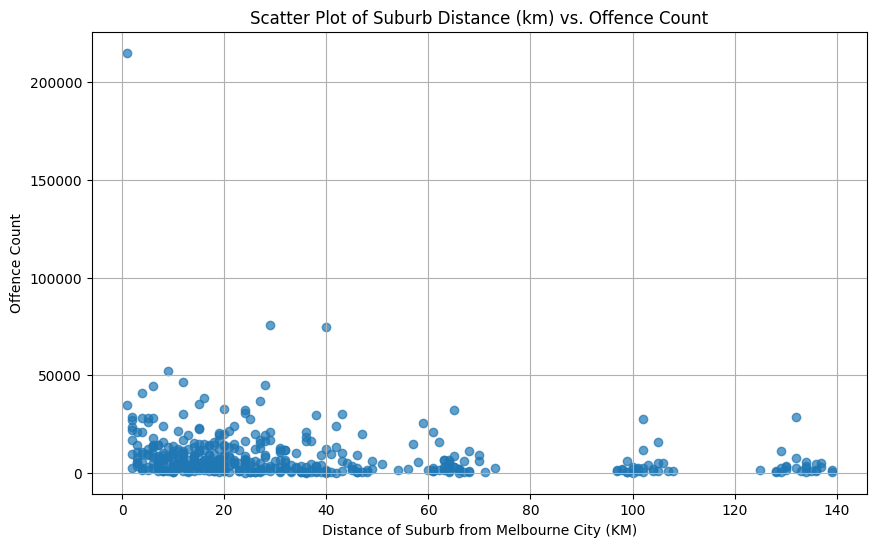

Correlation coefficient between Suburb Distance and Offence Count: -0.1747


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import re


def suburb_distance_from_city_vs_offence_count():

    cm = pd.read_csv("imputed_data_communities_new.csv")
    cm["Type"] = cm["Community Name"].apply(extract_type)

    suburbs_df = cm[cm["Type"] == "Suburb"].copy()

    # Load drug offences data
    suburb_drug_offences_df = pd.read_excel('LGA Offences.xlsx', sheet_name='Table 03')

    # Strip leading and trailing spaces and convert to lowercase
    suburbs_df['Community Name'] = suburbs_df['Community Name'].str.replace(r' \((Suburb|suburb)\)', '', regex=True).str.strip().str.lower()
    suburb_drug_offences_df['Suburb/Town Name'] = suburb_drug_offences_df['Suburb/Town Name'].str.strip().str.lower()
    
    # Group by suburb and sum offence counts
    suburb_drug_offenses_grouped = suburb_drug_offences_df.groupby('Suburb/Town Name')['Offence Count'].sum().reset_index()

    suburb = []
    distance_list = []  

    # Creates the data frame for a suburb and it's distance away from Melbourne
    for index, suburbs in suburbs_df.iterrows():
        location = suburbs["Location"]
        distance = int(extract_distance(location)) 

        suburb.append(suburbs["Community Name"])  
        distance_list.append(distance)  

    distance_df = pd.DataFrame({
        "Community Name": suburb,
        "Distance": distance_list
    })

    # Ensure both DataFrames have lowercase, standardized 'Community Name' columns
    distance_df['Community Name'] = distance_df['Community Name'].str.strip().str.lower()
    suburb_drug_offenses_grouped['Suburb/Town Name'] = suburb_drug_offenses_grouped['Suburb/Town Name'].str.strip().str.lower()

    # Merge distance_df with suburb_drug_offenses_grouped
    merged_df = pd.merge(distance_df, suburb_drug_offenses_grouped, left_on='Community Name', right_on='Suburb/Town Name', how='inner')

    # Drop 'Suburb/Town Name' column after merging
    merged_df = merged_df.drop(columns=['Suburb/Town Name'])

    # Reordering columns for clarity (if necessary)
    merged_df = merged_df[['Community Name', 'Distance', 'Offence Count']]

    # Plot scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(merged_df["Distance"], merged_df['Offence Count'], alpha=0.7)
    plt.title('Scatter Plot of Suburb Distance (km) vs. Offence Count')
    plt.xlabel('Distance of Suburb from Melbourne City (KM)')
    plt.ylabel('Offence Count')
    plt.grid(True)
    plt.show()

    # Calculate correlation coefficient
    correlation = merged_df["Distance"].corr(merged_df['Offence Count'])
    print(f"Correlation coefficient between Suburb Distance and Offence Count: {correlation:.4f}")

    return



def extract_type(name):
    
    pattern_town = r'\(Suburb|suburb\)'

    if re.findall(pattern_town, name):
        return "Suburb"

def extract_distance(sentence):

    pattern = r'(\d+)km [A-Z]+ of Melbourne'
    var = re.match(pattern, sentence)

    if var:
        return var.group(1)


suburb_distance_from_city_vs_offence_count()